In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [5]:
# Gathering the Iris dataset
X=load_iris().data
y=load_iris().target

X.shape,y.shape

((150, 4), (150,))

In [14]:
# Using only 2 features for easy visualisation hence, let's decompose the 4 
# features into 2 via PCA
reduce=PCA(n_components=2).fit(X)
X_reduced=reduce.transform(X)
X_reduced.shape

(150, 2)

## Decision Tree via 'entropy' impurity measure

In [15]:
tree=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=1)
tree.fit(X_reduced,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

## Plotting the Decision Boundary

In [16]:
# F'n to plot the decision Boundary
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=['s','x','o','^','v']
    colors=('red','blue','lightgreen','gray','cyan')
    # get different colors for different classes present in 'y'.
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface.
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    # We use the min and the max values of above 2 features create a pair of grid arrays 
    # xx1 and xx2 via np.meshgrid()
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
    
    # Since we have trained our model of 2 featuers we need to flatten the grid arrays and
    # create a matrix that has the same number of columns as the Iris training dataset so that we can
    # use the `predict` method.
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    # Plotting the contour along with the predicted values
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot the class samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],           # Acts as a boolean mask and select the features as per the index where
                    y=X[y==cl,1],           # values comes out to be true
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

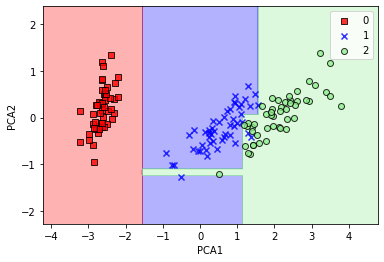

In [18]:
# Calling the above f'n 
plot_decision_regions(X_reduced,y,classifier=tree)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.show()

As expected DTs form a complex rectangular Decision Boundaries for classification.

## Visualising the DT
1. A nice feature in scikit-learn is that it allows us to export the decision tree as a `.dot` file after training, which we can visualize using the GraphViz program
2. In addition to GraphViz, we will use a Python library called pydotplus, which has capabilities similar to GraphViz and allows us to convert .dot data files into a decision tree image file
    a. pip3 install pydotplus

In [23]:
dot_data=export_graphviz(tree,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],
                        feature_names=['PCA1','PCA2'],out_file=None)
graph=graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

![](tree.png)